# Klasifikasi Citra Penyakit Radang Paru-Paru dan Paru Paru Terindikasi COVID19 Menggunakan Metode CNN 

Link Kaggle : https://www.kaggle.com/prashant268/chest-xray-covid19-pneumonia

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2"

In [ ]:
! pip install kaggle

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2

/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2


In [ ]:
! kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

100% 2.05G/2.06G [00:24<00:00, 103MB/s] 
100% 2.06G/2.06G [00:27<00:00, 79.2MB/s]


In [ ]:
!ls

chest-xray-covid19-pneumonia.zip  kaggle.json


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
!ls

Data  kaggle.json


In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2/Data'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

print('Alhamdulillah berjalan')

Alhamdulillah berjalan


In [ ]:
!ls

Data  kaggle.json


# Preprocessing

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2/Data'

train_dir = os.path.join(base_dir,'train')
test_dir  = os.path.join(base_dir,'test')

In [ ]:
print(os.listdir(train_dir))

print(len(os.listdir(train_dir+"/COVID19")))
print(len(os.listdir(train_dir+"/NORMAL")))
print(len(os.listdir(train_dir+"/PNEUMONIA")))

['COVID19', 'NORMAL', 'PNEUMONIA']
460
1266
3418


In [ ]:
print(os.listdir(test_dir))

print(len(os.listdir(test_dir+"/COVID19")))
print(len(os.listdir(test_dir+"/NORMAL")))
print(len(os.listdir(test_dir+"/PNEUMONIA")))

['COVID19', 'NORMAL', 'PNEUMONIA']
116
317
855


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)
print('Sudah berubah')

Sudah berubah


In [ ]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)
print('sudah berubah')

sudah berubah


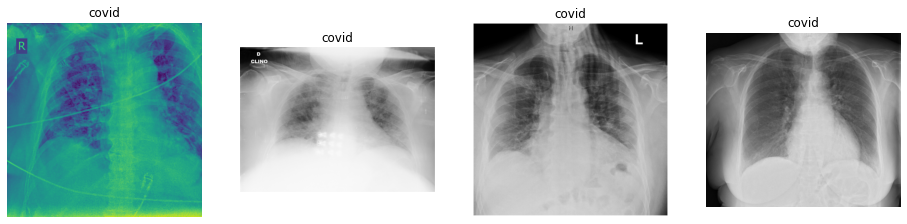

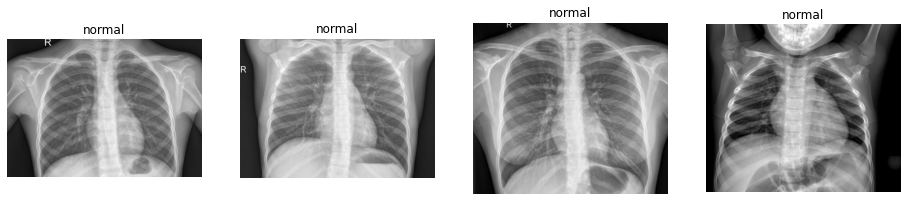

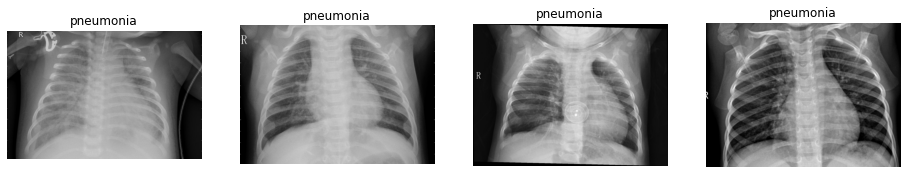

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_train_covid = os.path.join("/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2/Data/train/COVID19")
file_train_normal = os.path.join("/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2/Data/train/NORMAL")
file_train_pneumonia = os.path.join("/content/drive/MyDrive/Colab Notebooks/Kuliah/Semester 7/ML/Tugas_Besar/Modul_2/Data/train/PNEUMONIA")

covid_image = os.listdir(file_train_covid)
normal_image = os.listdir(file_train_normal)
pneumonia_image = os.listdir(file_train_pneumonia)

fname1 = [os.path.join(file_train_covid,fname)
        for fname in covid_image[:4]]

fname2 = [os.path.join(file_train_normal,fname)
        for fname in normal_image[:4]]

fname3 = [os.path.join(file_train_pneumonia,fname)
        for fname in pneumonia_image[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('covid')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('normal')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('pneumonia')
    plt.imshow(img)
    
plt.show()

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5144, 150, 150, 3)
Train Label =  (5144,)
Test Data =  (1288, 150, 150, 3)
Test Label =  (1288,)


In [ ]:
print("Data sebelum di normalisasi ", train_data[0][0][0])
x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di normalisasi ", x_train[0][0][0])

#untuk mempercepat komputasi, max array 255 -> 0&1 (cakupane lbh sempit)

Data sebelum di normalisasi  [88 88 88]
Data setelah di normalisasi  [0.34509805 0.34509805 0.34509805]


In [ ]:
from sklearn.preprocessing import LabelEncoder
print("Label sebelum di encoder ", train_label[0:8])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test =  lb.fit_transform(test_label)

print("Label setelah di encoder ", y_train[0:8])

Label sebelum di encoder  ['COVID19' 'COVID19' 'COVID19' 'COVID19' 'COVID19' 'COVID19' 'COVID19'
 'COVID19']
Label setelah di encoder  [0 0 0 0 0 0 0 0]


# Modelling (Skenario 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout, GlobalMaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))

model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=2, padding='same'))

model.add(GlobalMaxPooling2D())
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 dropout_3 (Dropout)         (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                  

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.00015), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_1 = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
258/258 [==============================] - 9s 36ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 2/100
258/258 [==============================] - 8s 31ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 3/100
258/258 [==============================] - 8s 31ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 4/100
258/258 [==============================] - 8s 31ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 5/100
258/258 [==============================] - 8s 31ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 6/100
258/258 [==============================] - 8s 30ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 7/100
258/258 [==============================] - 8s 30ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 

# Modelling (Skenario 2)

In [ ]:
model2 = Sequential()

model2.add(InputLayer(input_shape=[150,150,3]))
model2.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(AveragePooling2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(AveragePooling2D(pool_size=2, padding='same'))

model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(Dropout(0.2))
model2.add(AveragePooling2D(pool_size=2, padding='same'))

model2.add(GlobalMaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Flatten())

In [ ]:
model2.add(Dense(2128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 dropout_7 (Dropout)         (None, 150, 150, 16)      0         
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 38, 32)       0         
 ePooling2D)                                          

In [ ]:
model2.compile(optimizer=Adam(lr=0.00015), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_2 = model2.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
258/258 [==============================] - 8s 31ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 2/100
258/258 [==============================] - 8s 29ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 3/100
258/258 [==============================] - 8s 29ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 4/100
258/258 [==============================] - 8s 30ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 5/100
258/258 [==============================] - 8s 29ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 6/100
258/258 [==============================] - 8s 30ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 7/100
258/258 [==============================] - 8s 29ms/step - loss: 0.0000e+00 - acc: 0.2461 - val_loss: 0.0000e+00 - val_acc: 0.2461
Epoch 

# Plotting 

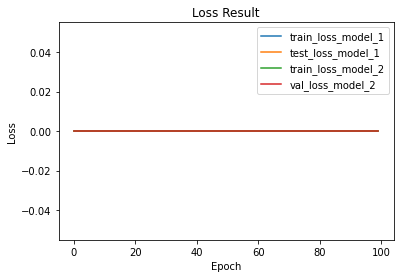

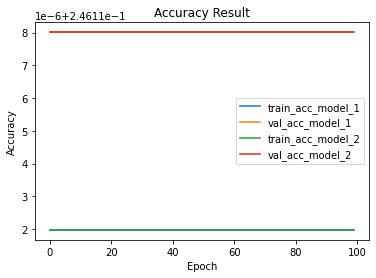

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_1.history["loss"], label="train_loss_model_1")
plt.plot(model_1.history["val_loss"], label="test_loss_model_1")
plt.plot(model_2.history["loss"], label="train_loss_model_2")
plt.plot(model_2.history["val_loss"], label="val_loss_model_2")
plt.title("Loss Result")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.plot(model_1.history["acc"], label="train_acc_model_1")
plt.plot(model_1.history["val_acc"], label="val_acc_model_1")
plt.plot(model_2.history["acc"], label="train_acc_model_2")
plt.plot(model_2.history["val_acc"], label="val_acc_model_2")
plt.title("Accuracy Result")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.7.0


In [ ]:
# Create and train a new model instance.
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('model1.h5')

In [ ]:
model2.save('model2.h5')